<a href="https://colab.research.google.com/github/dellavecchiaemiliano/Quantitative_financial_modelling/blob/main/Hurst_exponent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libraries**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# **Importing data**

In [ ]:
ftse = '/content/drive/MyDrive/Classroom/Quantitative Financial Modelling (2022-23) Finance and Insurance, Financial Risk and Data Analysis/^FTSE.csv'
df = pd.read_csv(ftse, parse_dates=['Date'], index_col='Date')
df = df.dropna()['Close']
df                                                               

Date
1984-01-03     997.500000
1984-01-04     998.599976
1984-01-05    1015.799988
1984-01-06    1029.000000
1984-01-09    1034.599976
                 ...     
2021-12-21    7297.399902
2021-12-22    7341.700195
2021-12-23    7373.299805
2021-12-24    7372.100098
2021-12-29    7447.100098
Name: Close, Length: 9599, dtype: float64

# **Computing logarithmic returns**

In [ ]:
df_logret = np.log(df) - np.log(df.shift(1))    
df_logret = df_logret.dropna()                     
returns = pd.DataFrame(index=df.index)
returns['Prices'] = df
returns['Log Returns'] = df_logret
returns

,Prices,Log Returns
Date,,
1984-01-03,997.500000,NaN
1984-01-04,998.599976,0.001102
1984-01-05,1015.799988,0.017077
1984-01-06,1029.000000,0.012911
1984-01-09,1034.599976,0.005427
...,...,...
2021-12-21,7297.399902,0.013715
2021-12-22,7341.700195,0.006052
2021-12-23,7373.299805,0.004295


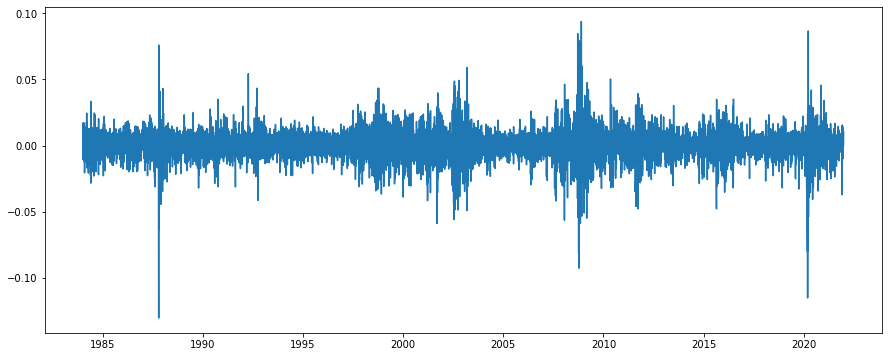

In [ ]:
plt.plot(df_logret)

# **Hurst exponent function**
In a theoretical efficient market we should observe a value equal to 0.5 of the Hurst exponent for each bunch of data we take into account in order to compute the moment. Remember that by assuming self-similarity and stationarity of the increments, from the relationship:
\begin{equation}
    \{X(t+a)-X(t)\} \sim \{a^{H}(X(t+1)-X(t)\}
\end{equation}
where $\sim$ denotes the equality in distribution, it holds the following equation: 
\begin{equation}
    \mathbf{E}[X(t)^q] = t^{Hq}\mathbf{E}X(1)^q
\end{equation}


In [ ]:
k = int(input("Enter the moment of the time series:"))                                                       
N = len(df)
h = []
moment = []
def get_hurst(time_series, max_lag=20):
    lags = range(2, max_lag)
    for lag in lags:
      h.append(lag)
      ret = np.subtract(time_series[lag:], time_series[:-lag])  
      moment.append(1/N*np.sum(abs(ret)**k))
    slope = np.polyfit(k*np.log(h), np.log(moment), 1)           
    return slope[0]

Enter the moment of the time series:3


In [ ]:
for lag in [20, 100, 300, 500, 1000]:
    hurst_exp = get_hurst(df.values, lag)
    print(f"Hurst exponent with {lag} lags: {hurst_exp:.4f}")

Hurst exponent with 20 lags: 0.4832
Hurst exponent with 100 lags: 0.4145
Hurst exponent with 300 lags: 0.4091
Hurst exponent with 500 lags: 0.4151
Hurst exponent with 1000 lags: 0.4215


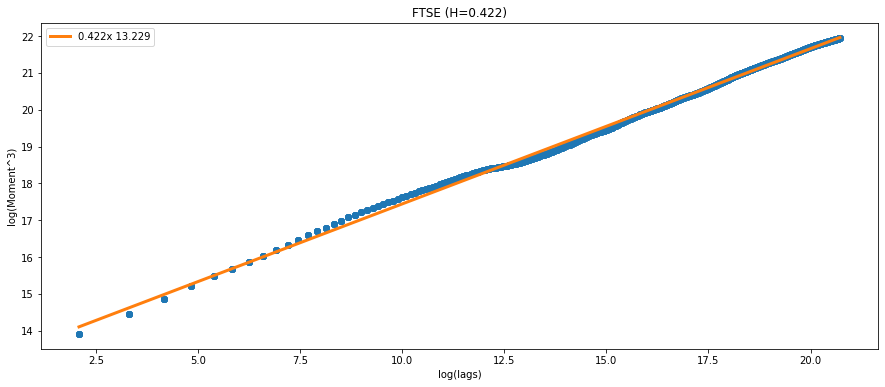

In [ ]:
x=np.log(h)
y=np.log(moment)
a, b = np.polyfit(k*x,y,deg=1)
plt.rcParams["figure.figsize"] = (15, 6)
fig, ax = plt.subplots()
ax.plot(k*x, y, 'o')
ax.plot(k*x, k*a*x+b, linewidth = 3, label = f'{a:.3f}x {b:.3f}')
plt.xlabel(f'log(lags)')
plt.ylabel(f'log(Moment^{k})')
ax.legend(loc='upper left')
ax.set_title(f'FTSE (H={a:.3f})')
plt.show()